# WAVE EQUATION DATA GENERATION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
#1D linear advection equation (discretizing usinrut938090g FTBS)
L = 1
T = 10
gridpoints = [10,20,40,80,128]
deltax = [L/p for p in gridpoints]
c = 1
deltat = 0.005
timesteps = np.linspace(0,T, num = int(T/deltat))
i = 4 #choose how many grid points you want
x = np.linspace(0,L,num = gridpoints[i])

In [ ]:
def check_stability(c,deltat,deltax,i): #ensuring that stability criteria is holding good
    return c*deltat/deltax[i] <= 1

In [ ]:
check_stability(c,deltat,deltax,i)

In [ ]:
u_initial = np.zeros(gridpoints[i])
freq = 10
for i in range(0,gridpoints[i]):
    if x[i] < math.pi/freq:
        u_initial[i] = math.sin(freq*x[i])
    else:
        break

In [ ]:
plt.plot(x,u_initial)
plt.show()

In [ ]:
def FTBS(x,timesteps,u_initial,gamma):

    U = np.zeros((len(x),len(timesteps)))
    for t in range(len(timesteps)):
        if t == 0:
            U[:,t] = u_initial
        else:
            for i in range(len(x)):
                if i == 0:
                    U[i,t] = U[-1,t-1]
                else:
                    U[i,t] = U[i,t-1]*(1-gamma) + gamma*U[i-1,t-1]

    return U

In [ ]:
U = FTBS(x,timesteps,u_initial,c*deltat/deltax[4])

In [ ]:
U.shape

In [ ]:
for t in range(10):
    plt.plot(x,U[:,t])
plt.xlabel('X')
plt.ylabel('U(x) for different timesteps')
plt.show()

In [ ]:
plt.plot(x,U[:,190])
plt.xlabel("X")
plt.ylabel("U(x) for a given t")
plt.show()

In [ ]:
U.shape

In [ ]:
plt.imshow(U);

# BURGER'S EQUATION DATA GENERATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import torch
import torch.nn as nn
import torch.optim as optim

## Hyperparameters

In [2]:
DEBUG = 1

In [3]:
#1D linear advection equation (discretizing using FTBS)
L = 1
T = 10
gridpoints = [10,20,40,80,128]
i = 4
delx = [L/p for p in gridpoints]
x = np.linspace(0,L,num = gridpoints[i])
delt = 0.001
timesteps = np.linspace(0,T, num = int(T/delt))

In [12]:
u_init = np.zeros(gridpoints[i])
freq = 4*(math.pi)/L
for j in range(0,gridpoints[i]):
    u_init[j] = 2 + np.sin(freq*x[j]) + 0.5*np.sin(2*freq*x[j])

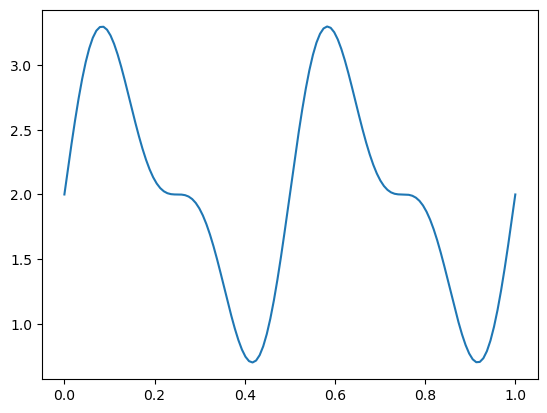

In [13]:
plt.plot(x,u_init)
plt.show()

discretizing du/dt + d(0.5*u**2)/dx = 0

In [14]:
def Burger_Equation(x,timesteps,u_initial,delt,delx):
    U = np.zeros((len(x),len(timesteps)))
    
    for t in range(len(timesteps)):
        if t == 0:
            U[:,t] = u_initial
        else:            
            for i in range(len(x)):
                
                if i == 0:
                    #U[i,t] = U[-1,t-1]
                    U[i,t] = U[i+1,t-1]
                
                else:
                    if U[i,t-1] >= 0:
                        U[i,t] = U[i,t-1] - (delt/delx)*(U[i,t-1]**2 - U[i-1,t-1]**2)*0.5
                    else:
                        try:
                            U[i,t] = U[i,t-1] - (delt/delx)*(U[i+1,t-1]**2 - U[i,t-1]**2)*0.5
                        except:
                            U[i,t] = U[i-1,t-1]
                            #U[i,t] = U[i,t-1] - (delt/delx)*(U[0,t-1]**2 - U[i,t-1]**2)*0.5
                
    return U

In [ ]:
# def Burger_Equation(x,timesteps,u_initial,delt,delx):
#     U = np.zeros((len(x),len(timesteps)))
    
#     for t in range(len(timesteps)):
#         if t == 0:
#             U[:,t] = u_initial
#         else:            
#             for i in range(len(x)):
                
#                 if U[i,t-1] >= 0:
#                     try:
#                         U[i,t] = U[i,t-1] - (delt/delx)*(U[i,t-1]**2 - U[i-1,t-1]**2)*0.5
#                     except:
#                         U[i,t] = U[-1,t-1]

#                 else:
#                     try:
#                         if i == 0:
#                             U[i,t] = U[-1,t-1]
#                         else:
#                             U[i,t] = U[i,t-1] - (delt/delx)*(U[i+1,t-1]**2 - U[i,t-1]**2)*0.5
#                     except:
#                         U[i,t] = U[i,t-1] - (delt/delx)*(U[0,t-1]**2 - U[i,t-1]**2)*0.5
                
#     return U# def Burger_Equation(x,timesteps,u_initial,delt,delx):
#     U = np.zeros((len(x),len(timesteps)))
    
#     for t in range(len(timesteps)):
#         if t == 0:
#             U[:,t] = u_initial
#         else:            
#             for i in range(len(x)):
                
#                 if U[i,t-1] >= 0:
#                     try:
#                         U[i,t] = U[i,t-1] - (delt/delx)*(U[i,t-1]**2 - U[i-1,t-1]**2)*0.5
#                     except:
#                         U[i,t] = U[-1,t-1]

#                 else:
#                     try:
#                         if i == 0:
#                             U[i,t] = U[-1,t-1]
#                         else:
#                             U[i,t] = U[i,t-1] - (delt/delx)*(U[i+1,t-1]**2 - U[i,t-1]**2)*0.5
#                     except:
#                         U[i,t] = U[i,t-1] - (delt/delx)*(U[0,t-1]**2 - U[i,t-1]**2)*0.5
                
#     return U

In [15]:
U = Burger_Equation(x,timesteps,u_init,delt,delx[4])

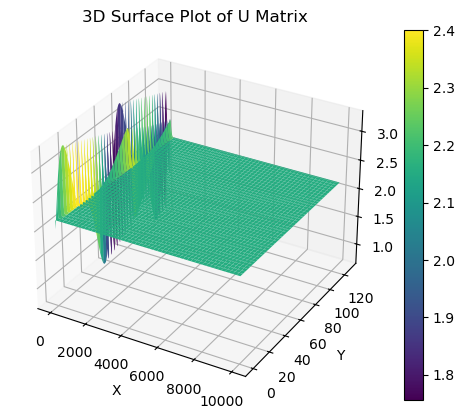

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for x and y coordinates
X = np.arange(U.shape[1])
Y = np.arange(U.shape[0])
X, Y = np.meshgrid(X, Y)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, U, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
ax.set_title('3D Surface Plot of U Matrix')

# Add a color bar which maps values to colors
fig.colorbar(surf)

plt.show()


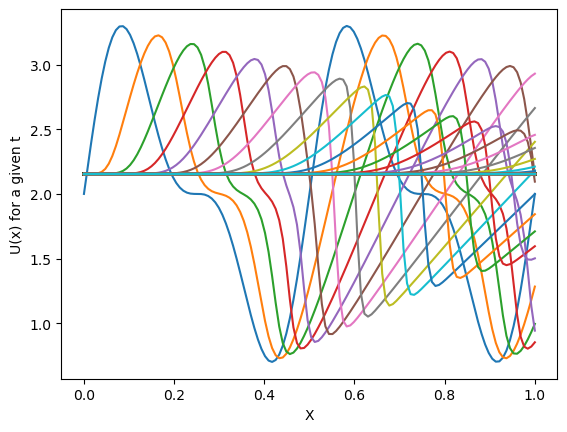

In [17]:
for i in range(0,len(timesteps),25):
    plt.plot(x,U[:,i])
    plt.xlabel("X")
    plt.ylabel("U(x) for a given t")
    #plt.show()

The results are correct for the beginning time steps till the shock occurs, after which the shock should be propagating towards the right which isn't happening in this case.

# MODEL ARCHITECTURE

U is our dataset for training the PDE Refiner model

In [90]:
class fourier_embedding():
    def __init__(self, dim):
        self.dim = dim

    def forward(self, timesteps, max_period=10000):

        half = self.dim // 2
        timesteps = torch.tensor([timesteps])
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half)
        args = timesteps[:, None].float() * freqs[None]
        embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
        embedding = torch.reshape(embedding, (1, 1, self.dim))
        return embedding

In [91]:
class DoubleConv1D(nn.Module):
    def __init__(self, in_channels, out_channels, time_emb_dim):
        super(DoubleConv1D, self).__init__()
        self.conv_a = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=1, padding_mode='reflect', padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True)
        )
        
        self.conv_b = nn.Sequential(
            nn.Conv1d(out_channels, out_channels, kernel_size=3, stride=1, padding_mode='reflect', padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True)
        )

        self.time_mlp = nn.Linear(time_emb_dim, out_channels)

    def forward(self, x, t):
        h = self.conv_a(x)
        time_emb = nn.functional.relu(self.time_mlp(t))
        time_emb = torch.reshape(time_emb, (1, h.shape[1], 1))
        h = h + time_emb
        h = self.conv_b(h)
        return h
        
class UNet1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet1D, self).__init__()
        down_channels = [64, 128, 256]
        up_channels = [256, 128, 64]
        time_emb_dim = 64
        self.fourier_emb = fourier_embedding(time_emb_dim)
        self.conv1 = DoubleConv1D(in_channels, down_channels[0], time_emb_dim)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = DoubleConv1D(down_channels[0], down_channels[1], time_emb_dim)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.conv3 = DoubleConv1D(down_channels[1], down_channels[2], time_emb_dim)

        self.up4 = nn.ConvTranspose1d(up_channels[0], up_channels[1], kernel_size=2, stride=2)
        self.conv4 = DoubleConv1D(up_channels[0], up_channels[1], time_emb_dim)
        self.up5 = nn.ConvTranspose1d(up_channels[1], up_channels[2], kernel_size=2, stride=2)
        self.conv6 = DoubleConv1D(up_channels[1], up_channels[2], time_emb_dim)
        self.conv7 = nn.Conv1d(up_channels[2], out_channels, kernel_size=1)

    def forward(self, x1, x2, k):

        x = torch.cat((x1,x2), 1)
        t = self.fourier_emb.forward(k)
        if DEBUG: print (f'Shape of x = {x.shape}')
        if DEBUG: print (f'Shape of t = {t.shape}')
        conv1 = self.conv1(x, t)
        if DEBUG: print (f'Shape of conv1 = {conv1.shape}')
        pool1 = self.pool1(conv1)
        conv2 = self.conv2(pool1, t)
        pool2 = self.pool2(conv2)
        conv3 = self.conv3(pool2, t)
        up4 = self.up4(conv3)
        merge5 = torch.cat([up4, conv2], dim=1)
        conv6 = self.conv4(merge5, t)
        up5 = self.up5(conv6)
        merge7 = torch.cat([up5, conv1], dim=1)
        conv6 = self.conv6(merge7, t)
        conv7 = self.conv7(conv6)

        return conv7 #nn.functional.relu(conv7)

In [92]:
# torch.manual_seed(77)
class PDERefiner(nn.Module):
    
    def __init__(self, num_steps, min_noise_std):
        super(PDERefiner, self).__init__()
        torch.manual_seed(77)
        self.num_steps = num_steps
        self.min_noise_std = min_noise_std
        self.neural_operator = UNet1D(in_channels = 2, out_channels = 1)

    def train_step(self,u_t, u_prev):
        
        k = random.randint(0,self.num_steps + 1)
        if k == 0:
            pred = self.neural_operator(u_prev, torch.zeros_like(u_t), k)
            target = u_t
        else:
            noise_std = self.min_noise_std**(k/self.num_steps)
            noise = torch.randn_like(u_t)
            u_t_noised = u_t + noise*noise_std
            pred = self.neural_operator(u_prev, u_t_noised, k)
            target = noise
            
        loss = nn.functional.mse_loss(pred, target)
        #+ nn.functional.mse_loss(pred[:,:,-1], pred[:,:,0]) incorporating the boundary condition

        return loss

    def predict_next_solution(self, u_prev):
        u_hat_vals = []
        u_hat_t = self.neural_operator(u_prev, torch.zeros_like(u_prev), 0)
        u_hat_vals.append(u_hat_t)
        for k in range(1, self.num_steps + 1):
            noise_std = self.min_noise_std ** (k/self.num_steps)
            noise = torch.randn_like(u_prev)
            u_hat_t_noised = u_hat_t + noise*noise_std
            pred = self.neural_operator(u_prev, u_hat_t_noised, k)
            u_hat_t = nn.functional.relu(u_hat_t_noised - pred*noise_std)
            u_hat_vals.append(u_hat_t)

        return u_hat_vals

In [93]:
#pip install diffusers

In [94]:
# import diffusers
# from diffusers.schedulers import DDPMScheduler

# class PDERefinerDiffusion(nn.Module):
    
#     def __init__(self,num_steps, min_noise_std):
#         super(PDERefinerDiffusion, self).__init__()
#         betas = [min_noise_std**(k/num_steps) for k in reversed(range(num_steps + 1))]
#         self.scheduler = DDPMScheduler(num_train_timesteps = num_steps + 1,
#                                        trained_betas = betas,
#                                        prediction_type = 'v_prediction',
#                                        clip_sample = False)
#         self.num_steps = num_steps
#         self.neural_operator = UNet1D(in_channels = 2, out_channels= 1)

#     def train_step(self, u_t, u_prev):
#         k = torch.randint(0,self.num_steps + 1, (u_t.shape[0],))
#         noise_factor = self.scheduler.alphas_cumprod[k]
#         signal_factor = 1 - noise_factor
#         noise = torch.randn_like(u_t)
#         u_t_noised = self.scheduler.add_noise(u_t, noise, k)
#         pred = self.neural_operator(u_prev, u_t_noised, k)
#         target = (noise_factor**0.5)*noise - (signal_factor**0.5)*u_t
#         loss = nn.functional.mse_loss(pred, target)

#         return loss
    
#     def predict_next_solution(self, u_prev):
#         u_hat_vals = []
#         u_hat_t_noised = torch.randn_like(u_prev)
#         for scheduler_t in self.scheduler.timesteps:
#             k = self.num_steps - scheduler_t
#             pred = self.neural_operator(u_prev, u_hat_t_noised, k)
#             out = self.scheduler.step(pred, scheduler_t, u_hat_t_noised)
#             u_hat_t_noised = nn.functional.relu(out.prev_sample)
#             u_hat_vals.append(u_hat_t_noised)
         
#         return u_hat_vals

In [229]:
# Initialize your PDERefiner model and optimizer
torch.manual_seed(77)
pdemodel = PDERefiner(num_steps= 6, min_noise_std= 4e-3)
optimizer = optim.Adam(pdemodel.parameters(), lr=0.0001)

In [230]:
loss_vals = []


# Define the number of training iterations
num_epochs = 50
DEBUG=0

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()
    local_loss=0.0
    for time_step in range(500): #range(U.shape[1]-1):
        
        optimizer.zero_grad()
        u_t = torch.tensor(U[:,time_step+1:time_step+2]).reshape(1,1,128).float()
        u_prev = torch.tensor(U[:,time_step:time_step+1]).reshape(1,1,128).float()
        random.seed(int(time_step*epoch))
        loss = pdemodel.train_step(u_t, u_prev)
        loss.backward()
        optimizer.step()
        local_loss += loss.item()

    loss_vals.append(local_loss)
    if (epoch+1)%10==0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {local_loss}')

Epoch [9/50], Loss: 38.36025645211339
Epoch [19/50], Loss: 17.606613542768173
Epoch [29/50], Loss: 15.072597514663357
Epoch [39/50], Loss: 14.97837504374911
Epoch [49/50], Loss: 11.964583886350738


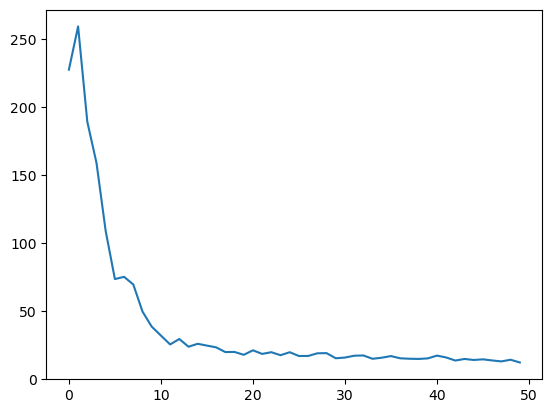

In [232]:
plt.plot(loss_vals);
# plt.xscale('log')
# plt.yscale('log')

Log loss plots

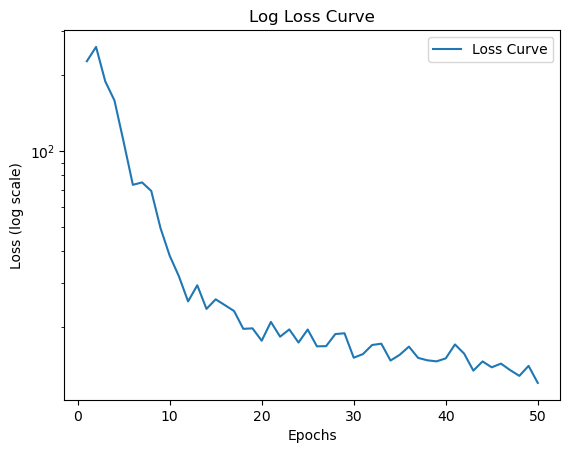

In [231]:
x_values = np.arange(1, len(loss_vals) + 1)

plt.plot(x_values, loss_vals, label='Loss Curve')
plt.yscale('log')
plt.title('Log Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.show()

Sample results from the model (only one time step prediction into the future)

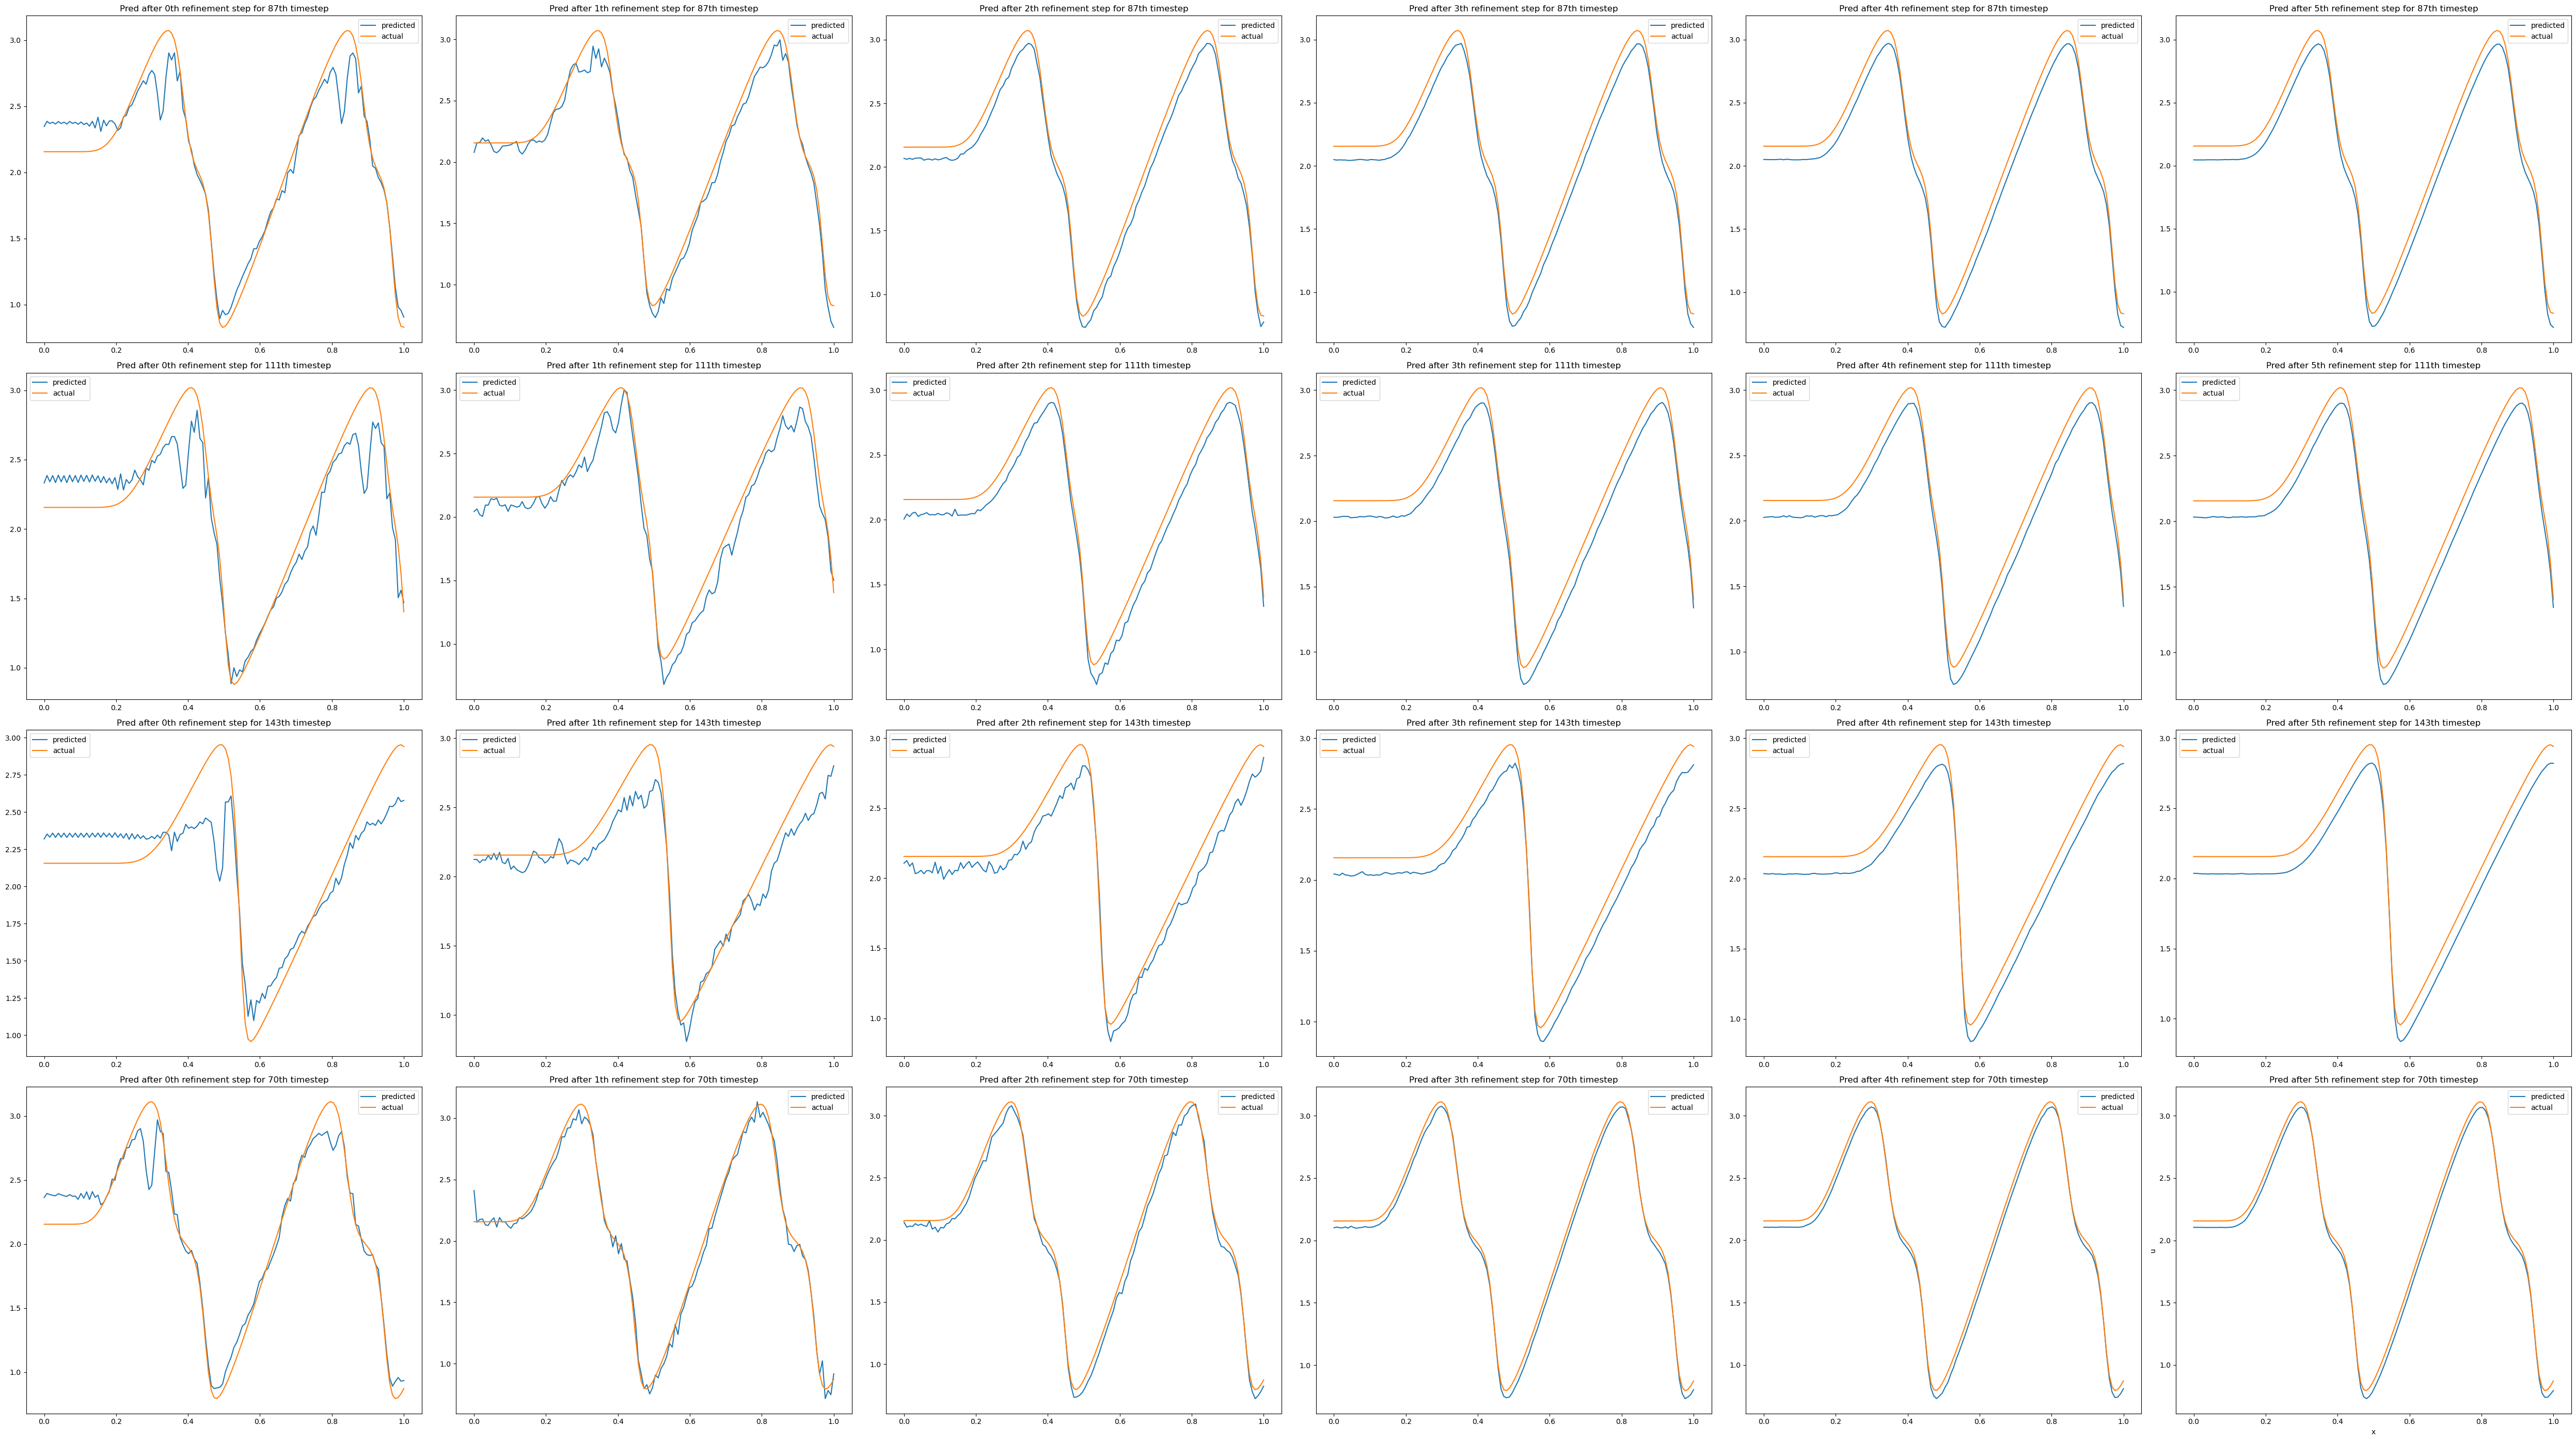

In [233]:
num_rows = 4
num_cols = 6

fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 7*num_rows))  # Adjust figsize as needed

for i in range(num_rows):
    time_step = random.randint(0,500)
    u_prev_example = torch.tensor(U[:,time_step:time_step+1]).reshape(1,1,128).float()
    predicted_solution = pdemodel.predict_next_solution(u_prev_example)
    for j in range(num_cols):
        axs[i,j].plot(x, predicted_solution[j].reshape(128,1).detach().numpy())
        axs[i, j].plot(x,U[:,time_step:time_step+1])
        plt.xlabel('x')
        plt.ylabel('u')
        axs[i,j].legend(['predicted','actual'])
        axs[i, j].set_title(f'Pred after {j}th refinement step for {time_step}th timestep')

plt.tight_layout()
plt.show()

Autoregressive plots

In [201]:
def autoregressive_call(U, rollout_time, time_step, n):
    num_plots = (rollout_time // n)
    fig, axs = plt.subplots(1, num_plots, figsize=(num_plots*5, 5))
    u_preds = []
    u_in = torch.tensor(U[:, time_step:time_step+1]).reshape(1, 1, 128).float()
    
    for t in range(rollout_time):
        pred_sol = pdemodel.predict_next_solution(u_in)
        u_preds.append(pred_sol[-1])
        u_in = u_preds[-1]

        if t % n == 0:
            plot_idx = t // n
            axs[plot_idx].plot(x, U[:, time_step + t:time_step + t + 1], 'r', label='Actual')
            axs[plot_idx].plot(x, u_preds[-1].reshape(128, 1).detach().numpy(), 'b', label='Predicted')
            axs[plot_idx].set_xlabel('x')
            axs[plot_idx].set_ylabel('u')
            axs[plot_idx].grid(False)
            axs[plot_idx].set_title(f'u pred after {t + 1} timesteps')
            axs[plot_idx].legend()
    
    plt.tight_layout()
    plt.show()

    return None

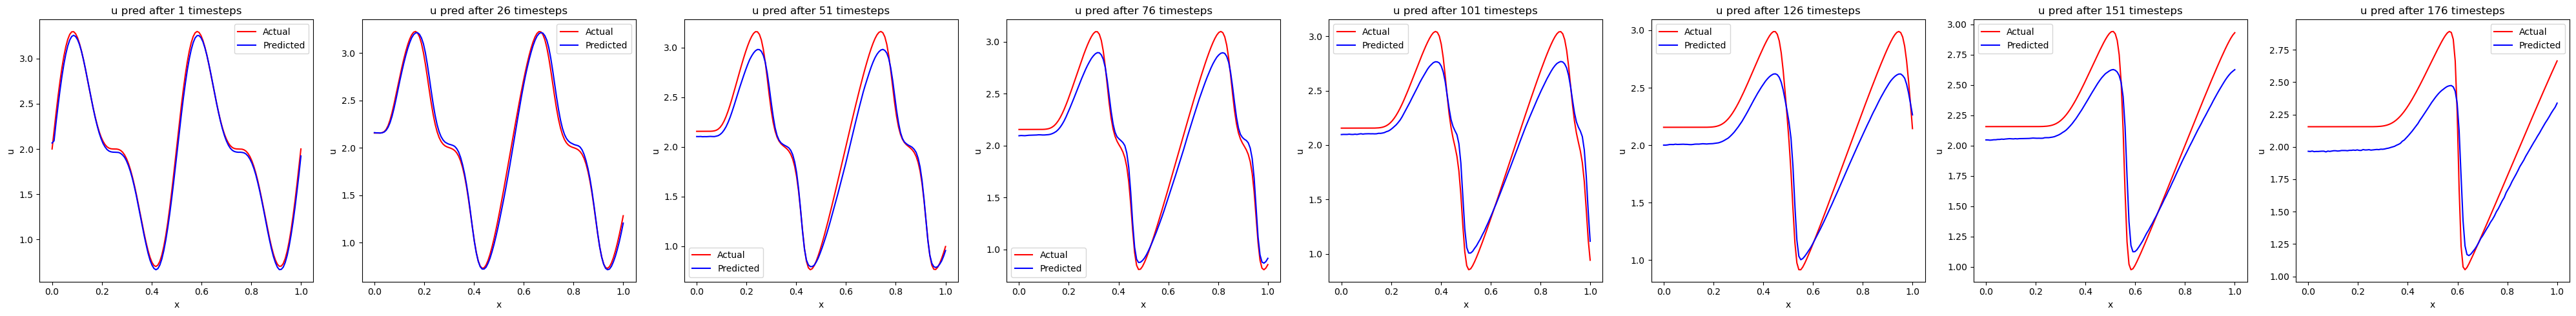

In [203]:
autoregressive_call(U, 200, 0, 25)

Observing the output over refinement steps

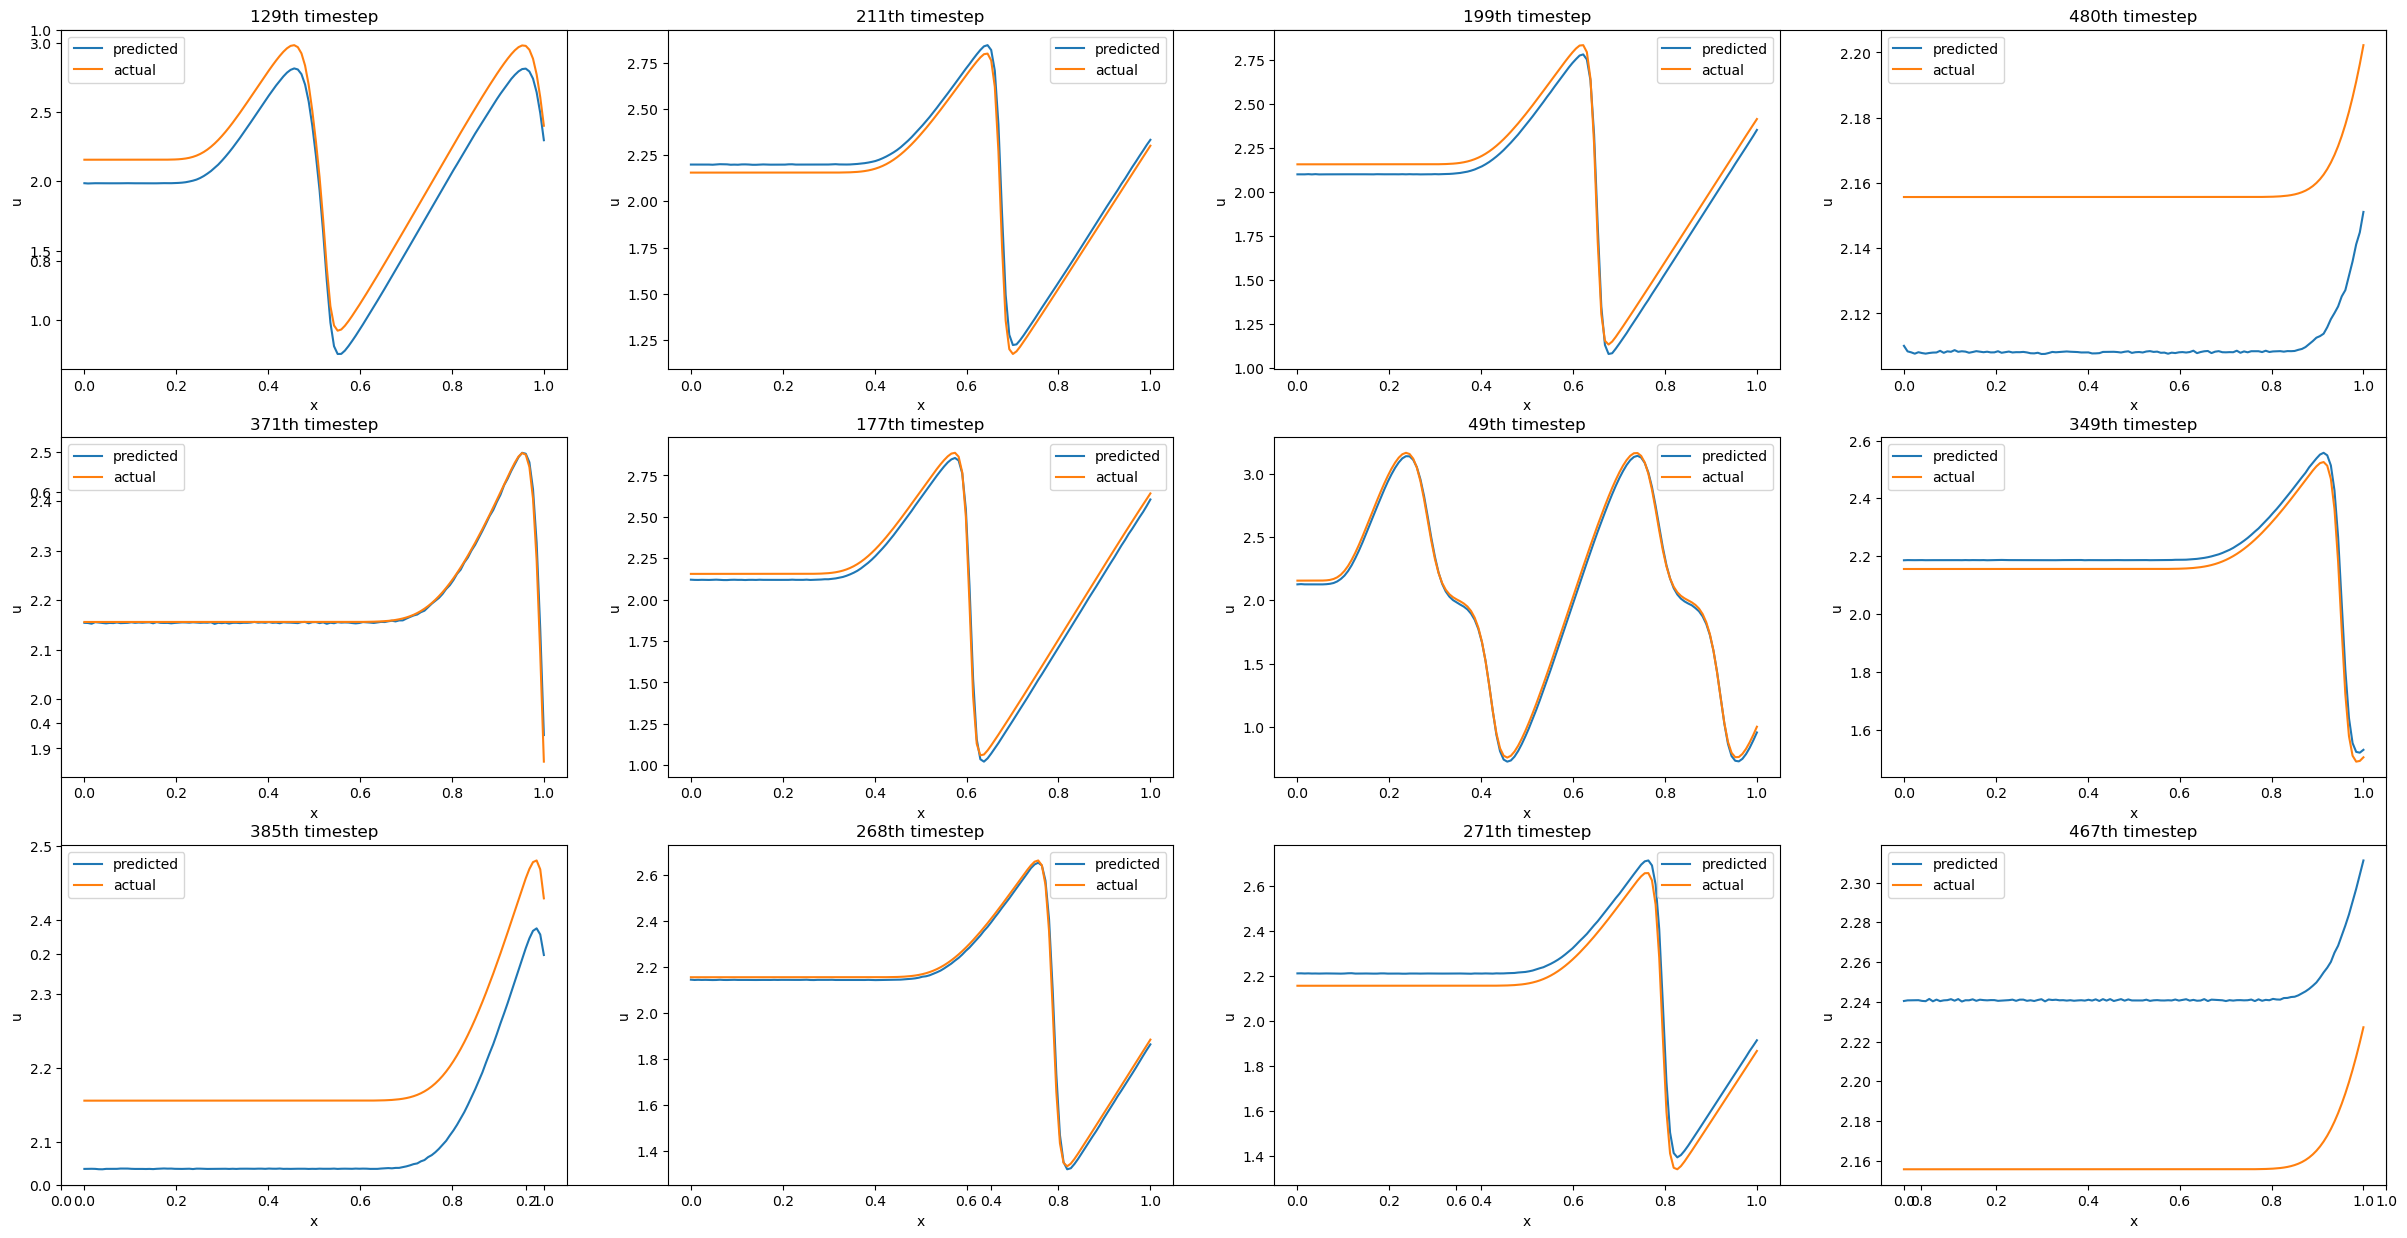

<Figure size 640x480 with 0 Axes>

In [247]:
plt.subplots(figsize=(30,15))
for i in range(12):
    time_step = random.randint(0,500)
    u_prev_example = torch.tensor(U[:,time_step:time_step+1]).reshape(1,1,128).float()
    predicted_solution = pdemodel.predict_next_solution(u_prev_example)
    plt.subplot(3,4,i+1)
    plt.plot(x, (predicted_solution[-1].reshape(128,1).detach().numpy()))
    plt.plot(x,U[:,time_step:time_step+1])
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title(f'{time_step}th timestep')
    plt.legend(['predicted','actual'])
    
plt.show()
plt.tight_layout()

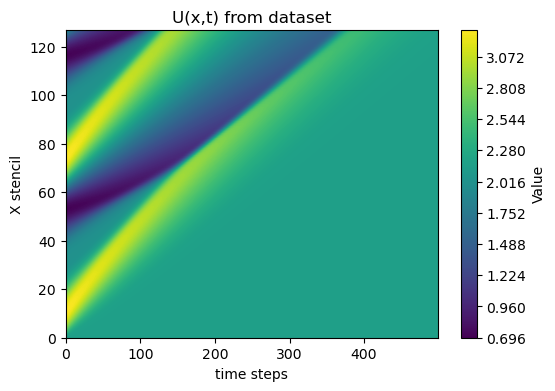

In [239]:
plt.figure(figsize=(6, 4))
contour = plt.contourf(U[:,:500], cmap='viridis', levels=512)
plt.colorbar(contour, label='Value', extend='both')
plt.title('U(x,t) from dataset')
plt.xlabel('time steps')
plt.ylabel('X stencil')
plt.show()

In [240]:
U_pred = np.zeros((128,500))
for time_step in range(500):
    u_prev_example = torch.tensor(U[:,time_step:time_step+1]).reshape(1,1,128).float()
    U_pred[:,time_step] = (pdemodel.predict_next_solution(u_prev_example))[-1].detach().numpy()

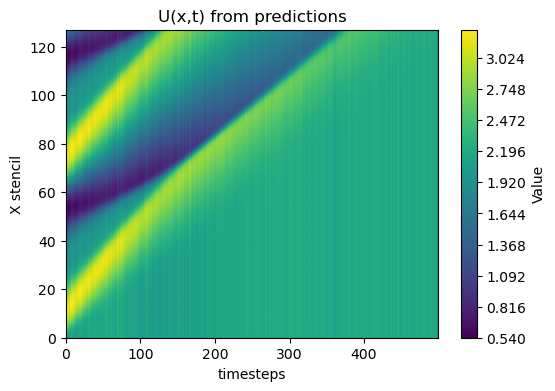

In [241]:
plt.figure(figsize=(6, 4))
contour = plt.contourf(U_pred, cmap='viridis', levels=512)
plt.colorbar(contour, label='Value', extend='both')
plt.title('U(x,t) from predictions')
plt.xlabel('timesteps')
plt.ylabel('X stencil')
plt.show()

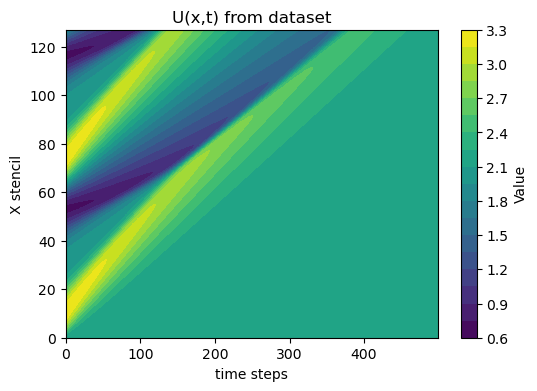

In [265]:
plt.figure(figsize=(6, 4))

# Filled contour plot
contourf = plt.contourf(U[:,:500], cmap='viridis', levels=20)
plt.colorbar(contourf, label='Value', extend='both')

plt.title('U(x,t) from dataset')
plt.xlabel('time steps')
plt.ylabel('X stencil')
plt.show()

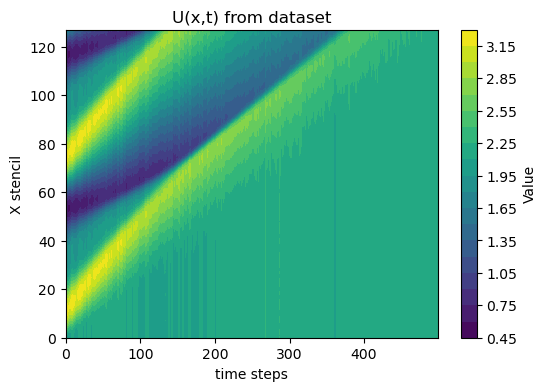

In [266]:
plt.figure(figsize=(6, 4))

# Filled contour plot
contourf = plt.contourf(U_pred, cmap='viridis', levels=20)
plt.colorbar(contourf, label='Value', extend='both')

plt.title('U(x,t) from dataset')
plt.xlabel('time steps')
plt.ylabel('X stencil')
plt.show()